In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

%matplotlib inline

from apyori import apriori
import utils

from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings(action='ignore')



In [2]:
Obesity_data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
Obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
le=LabelEncoder()
cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
Obesity_data[cols] = Obesity_data[cols].apply(LabelEncoder().fit_transform)
cols =(['FCVC','CAEC','CALC'])
Obesity_data[cols]=Obesity_data[cols].replace(['no','Sometimes','Frequently','Always'],[1,2,3,4])
Obesity_data['MTRANS']=Obesity_data['MTRANS'].replace(['Automobile','Motorbike','Bike','Public_Transportation','Walking'],[1,2,3,4,5])

In [5]:
Obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,1,0,2,3,2,0,2,0,0,1,1,4,Normal_Weight
1,Female,21,1.52,56.00,1,0,3,3,2,1,3,1,3,0,2,4,Normal_Weight
2,Male,23,1.80,77.00,1,0,2,3,2,0,2,0,2,1,3,4,Normal_Weight
3,Male,27,1.80,87.00,0,0,3,3,2,0,2,0,2,0,3,5,Overweight_Level_I
4,Male,22,1.78,89.80,0,0,2,1,2,0,2,0,0,0,2,4,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3,3,2,0,2,0,2,1,2,4,Obesity_Type_III
2107,Female,22,1.75,133.74,1,1,3,3,2,0,2,0,1,1,2,4,Obesity_Type_III
2108,Female,23,1.75,133.69,1,1,3,3,2,0,2,0,1,1,2,4,Obesity_Type_III
2109,Female,24,1.74,133.35,1,1,3,3,2,0,3,0,1,1,2,4,Obesity_Type_III


In [6]:
Obesity_data.shape

(2111, 17)

In [7]:
Obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [8]:
Obesity_data.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
Obesity_data.isnull().values.any()

False

In [10]:
Obesity_data.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,0.817622,0.883941,2.423496,2.687826,2.140692,0.020843,2.014685,0.045476,1.006632,0.664614,1.731407,3.363335
std,6.357078,0.093368,26.191163,0.386247,0.320371,0.583905,0.809680,0.468543,0.142893,0.688616,0.208395,0.895462,0.674009,0.515498,1.262721
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,23.000000,1.700000,83.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,4.000000
75%,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,4.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,5.000000


In [11]:
Obesity_data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

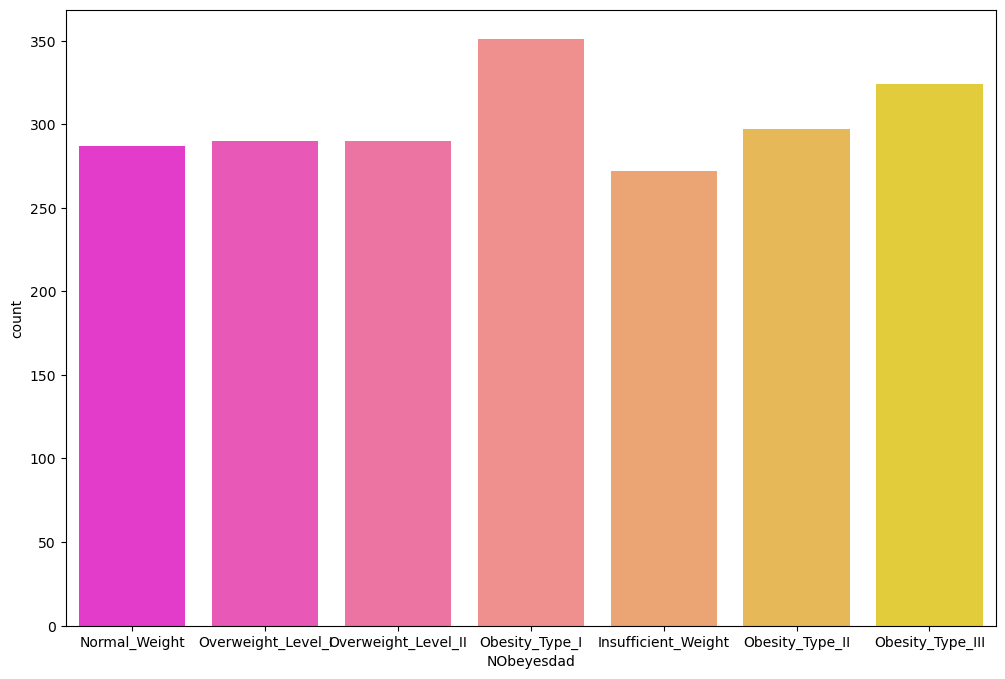

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='NObeyesdad',data=Obesity_data,palette='spring')

In [13]:
Obesity_data.corr()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
Age,1.000000,-0.025775,0.203451,0.205494,0.063392,0.005941,-0.043440,-0.084146,0.091354,-0.024554,-0.116028,-0.133161,-0.286071,0.045578,-0.600938
Height,-0.025775,1.000000,0.462264,0.247245,0.177721,-0.054231,0.243727,-0.048763,0.055725,0.180962,-0.133369,0.291291,0.058117,0.129569,-0.071765
Weight,0.203451,0.462264,1.000000,0.496819,0.272303,0.178954,0.103275,-0.287492,0.025747,0.186318,-0.201906,-0.047947,-0.039376,0.206676,0.005743
family_history_with_overweight,0.205494,0.247245,0.496819,1.000000,0.208036,0.023212,0.063365,-0.169787,0.017385,0.140150,-0.185422,-0.052682,0.025262,-0.036676,-0.099229
FAVC,0.063392,0.177721,0.272303,0.208036,1.000000,-0.031019,-0.006363,-0.150068,-0.050660,0.014174,-0.190658,-0.099741,0.063278,0.089520,-0.071444
FCVC,0.005941,-0.054231,0.178954,0.023212,-0.031019,1.000000,0.011111,0.054086,0.007760,0.061140,0.075343,0.013661,-0.077269,0.044279,0.072107
NCP,-0.043440,0.243727,0.103275,0.063365,-0.006363,0.011111,1.000000,0.094589,0.007110,0.063477,-0.014132,0.130322,0.013010,0.077209,-0.057277
CAEC,-0.084146,-0.048763,-0.287492,-0.169787,-0.150068,0.054086,0.094589,1.000000,0.055282,-0.134200,0.109179,0.026015,0.042935,-0.047540,0.044931
SMOKE,0.091354,0.055725,0.025747,0.017385,-0.050660,0.007760,0.007110,0.055282,1.000000,-0.036827,0.047731,0.010031,0.008646,0.082471,-0.013098
CH2O,-0.024554,0.180962,0.186318,0.140150,0.014174,0.061140,0.063477,-0.134200,-0.036827,1.000000,-0.001353,0.118205,-0.029207,0.097898,0.045095


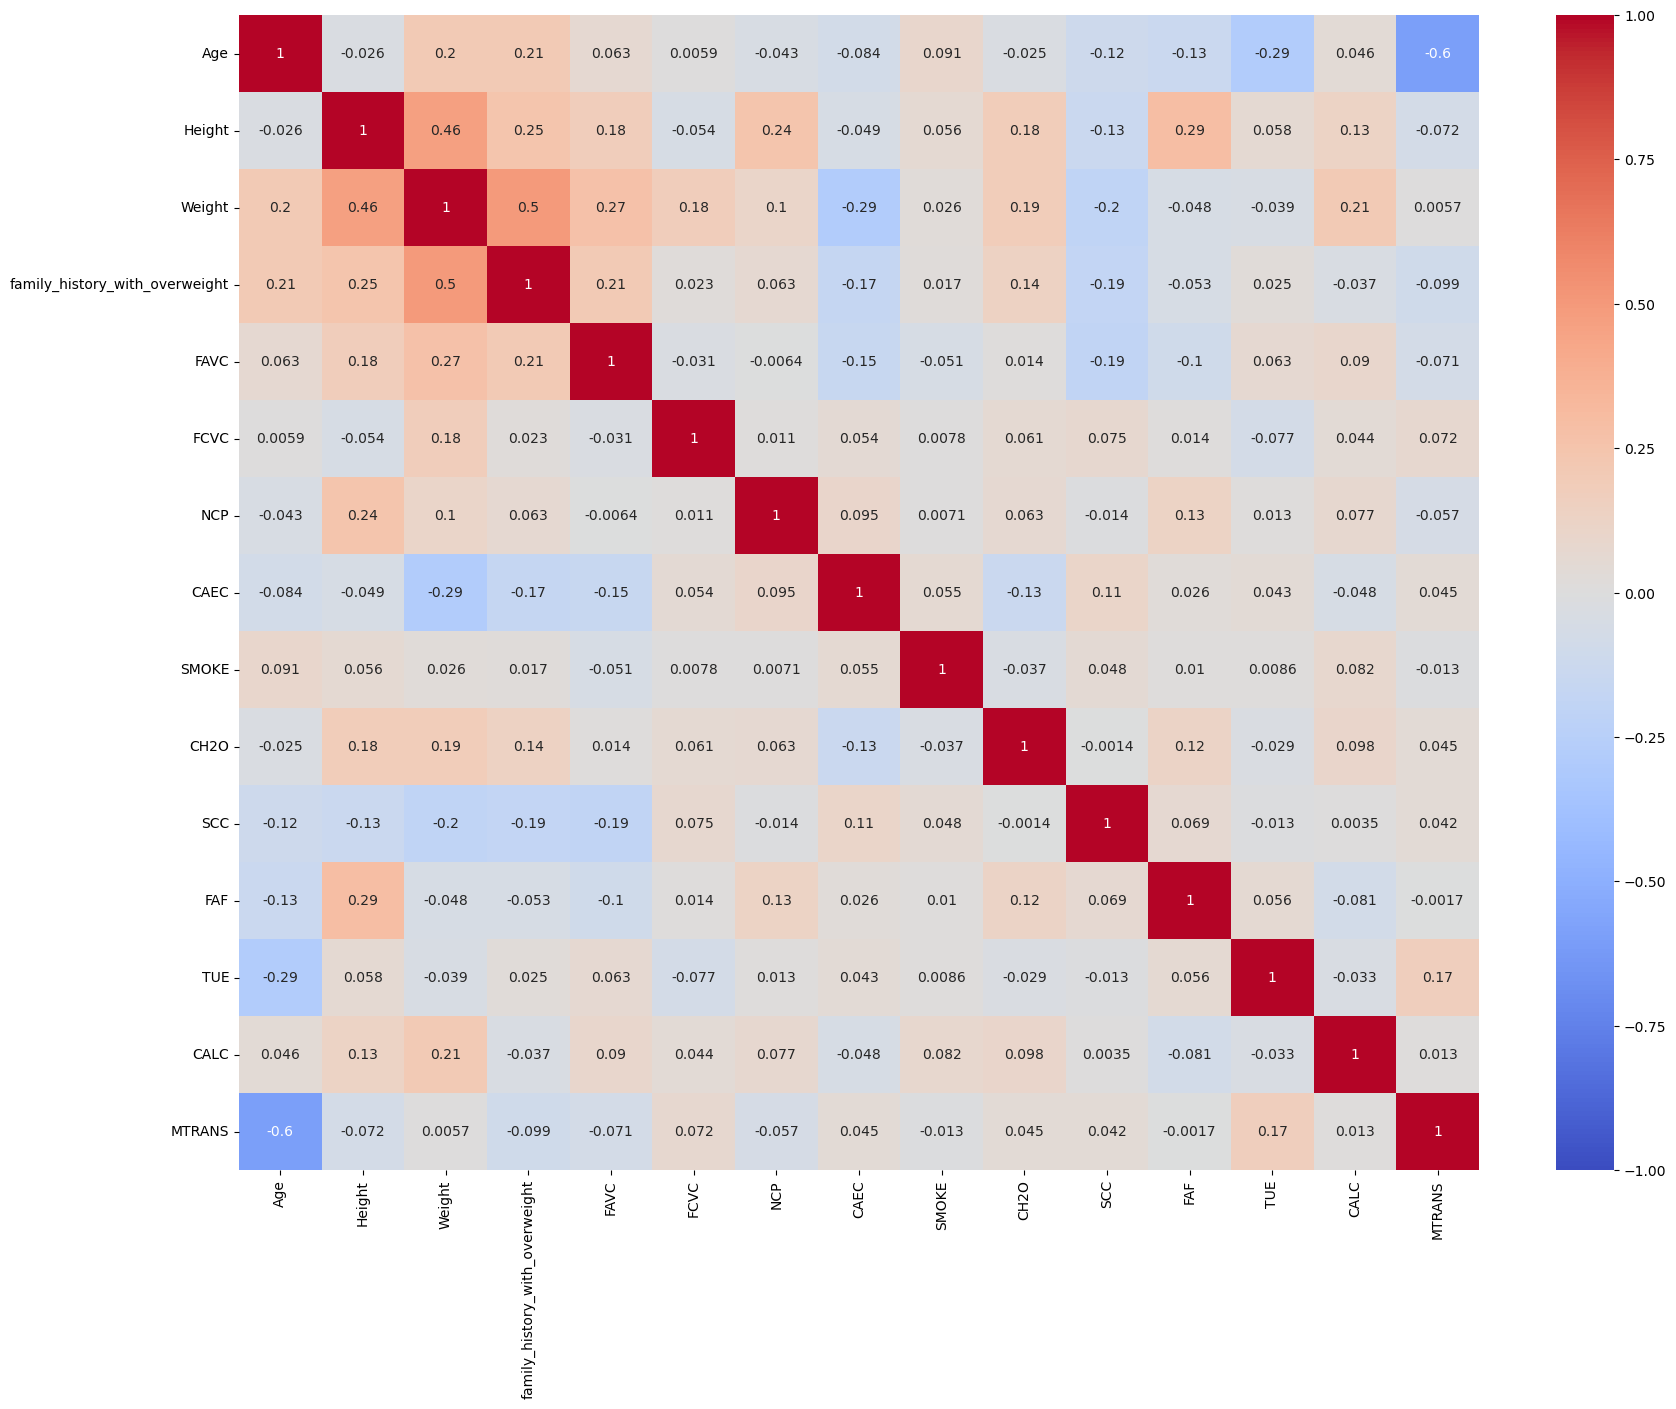

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(Obesity_data.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [15]:
columns = ['family_history_with_overweight',
          'FAVC',
          'FCVC',
          'NCP',
          'CAEC',
          'SMOKE',
          'CH2O',
          'SCC',
          'FAF',
          'TUE',
          'CALC',
          'MTRANS',
          'NObeyesdad']
not_used_columns = list(set(Obesity_data.columns.to_list()) - set(columns))
Obesity_data = pd.get_dummies(Obesity_data, columns=columns)
Obesity_data.drop(labels=not_used_columns, axis=1, inplace=True)

In [16]:
Obesity_data

,family_history_with_overweight_0,family_history_with_overweight_1,FAVC_0,FAVC_1,FCVC_1,FCVC_2,FCVC_3,NCP_1,NCP_2,NCP_3,...,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2107,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2108,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2109,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


# Association Rules Mining

In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [36]:
min_support = 0.01
max_len = 3
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.head(10).sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(CAEC_1),(family_history_with_overweight_0),0.024159,0.182378,0.015632,0.647059,3.547899,0.011226,2.316596
1,(FAVC_0),(family_history_with_overweight_0),0.116059,0.182378,0.046897,0.404082,2.215627,0.025731,1.372037
7,(NCP_4),(family_history_with_overweight_0),0.070583,0.182378,0.022738,0.322148,1.766373,0.009865,1.206195
5,(NCP_1),(family_history_with_overweight_0),0.149692,0.182378,0.043108,0.287975,1.578999,0.015807,1.148305
2,(FCVC_1),(family_history_with_overweight_0),0.048318,0.182378,0.013738,0.284314,1.558925,0.004925,1.142431
0,(family_history_with_overweight_0),(FAVC_0),0.182378,0.116059,0.046897,0.257143,2.215627,0.025731,1.189921
4,(family_history_with_overweight_0),(NCP_1),0.182378,0.149692,0.043108,0.236364,1.578999,0.015807,1.113498
6,(family_history_with_overweight_0),(NCP_4),0.182378,0.070583,0.022738,0.124675,1.766373,0.009865,1.061797
8,(family_history_with_overweight_0),(CAEC_1),0.182378,0.024159,0.015632,0.085714,3.547899,0.011226,1.067326
3,(family_history_with_overweight_0),(FCVC_1),0.182378,0.048318,0.013738,0.075325,1.558925,0.004925,1.029206


In [19]:
Obesity_data['NObeyesdad_Insufficient_Weight'].value_counts()

0    1839
1     272
Name: NObeyesdad_Insufficient_Weight, dtype: int64

In [34]:
min_support = 0.01
max_len = 5
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Insufficient_Weight\'}'
results_NObeyesdad_Overweight_Level_I = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_I.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1629115,"(CALC_1, FAF_2, CH2O_2, NCP_4, FAVC_1)",(NObeyesdad_Insufficient_Weight),0.011843,0.128849,0.011843,1.000000,7.761029,0.010317,inf
1,2081515,"(CALC_1, FAF_2, CH2O_2, NCP_4, CAEC_2)",(NObeyesdad_Insufficient_Weight),0.010895,0.128849,0.010895,1.000000,7.761029,0.009491,inf
2,2084167,"(CALC_1, FAF_2, CH2O_2, NCP_4, MTRANS_1)",(NObeyesdad_Insufficient_Weight),0.010895,0.128849,0.010895,1.000000,7.761029,0.009491,inf
3,1238149,"(CALC_1, FAF_2, CH2O_2, NCP_4, family_history_...",(NObeyesdad_Insufficient_Weight),0.011843,0.128849,0.011843,1.000000,7.761029,0.010317,inf
4,2081578,"(FAF_2, CH2O_2, NCP_4, CAEC_2, MTRANS_1)",(NObeyesdad_Insufficient_Weight),0.011843,0.128849,0.011843,1.000000,7.761029,0.010317,inf
5,649632,"(TUE_0, MTRANS_4, family_history_with_overweig...",(NObeyesdad_Insufficient_Weight),0.015632,0.128849,0.015159,0.969697,7.525847,0.013144,28.747987
6,759692,"(TUE_0, MTRANS_4, family_history_with_overweig...",(NObeyesdad_Insufficient_Weight),0.013738,0.128849,0.013264,0.965517,7.493408,0.011494,25.263382
7,1238212,"(FAF_2, CH2O_2, NCP_4, family_history_with_ove...",(NObeyesdad_Insufficient_Weight),0.012316,0.128849,0.011843,0.961538,7.462528,0.010256,22.649929
8,584908,"(CH2O_2, FAF_2, CALC_1, NCP_4)",(NObeyesdad_Insufficient_Weight),0.012316,0.128849,0.011843,0.961538,7.462528,0.010256,22.649929
9,734200,"(FAF_0, MTRANS_4, family_history_with_overweig...",(NObeyesdad_Insufficient_Weight),0.012316,0.128849,0.011843,0.961538,7.462528,0.010256,22.649929


In [21]:
Obesity_data['NObeyesdad_Normal_Weight'].value_counts()

0    1824
1     287
Name: NObeyesdad_Normal_Weight, dtype: int64

In [22]:
min_support = 0.01
max_len = 3
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Normal_Weight\'}'
results_NObeyesdad_Overweight_Level_I = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_I.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,73650,"(CALC_2, CAEC_3, FCVC_2)",(NObeyesdad_Normal_Weight),0.017054,0.135955,0.012790,0.750000,5.516551,0.010472,3.456182
1,111068,"(CH2O_2, CAEC_4, SMOKE_0)",(NObeyesdad_Normal_Weight),0.015159,0.135955,0.010895,0.718750,5.286694,0.008834,3.072162
2,10620,"(CH2O_2, CAEC_4)",(NObeyesdad_Normal_Weight),0.016106,0.135955,0.011369,0.705882,5.192048,0.009179,2.937755
3,8533,"(CAEC_4, NCP_3)",(NObeyesdad_Normal_Weight),0.015632,0.135955,0.010422,0.666667,4.903600,0.008296,2.592136
4,10631,"(MTRANS_4, CAEC_4)",(NObeyesdad_Normal_Weight),0.015632,0.135955,0.010422,0.666667,4.903600,0.008296,2.592136
5,389,(CAEC_4),(NObeyesdad_Normal_Weight),0.025107,0.135955,0.016580,0.660377,4.857340,0.013166,2.544134
6,10609,"(CAEC_4, SMOKE_0)",(NObeyesdad_Normal_Weight),0.023685,0.135955,0.015632,0.660000,4.854564,0.012412,2.541310
7,10627,"(SCC_0, CAEC_4)",(NObeyesdad_Normal_Weight),0.021317,0.135955,0.013264,0.622222,4.576694,0.010366,2.287179
8,73625,"(CAEC_3, FCVC_2, TUE_1)",(NObeyesdad_Normal_Weight),0.017527,0.135955,0.010895,0.621622,4.572276,0.008512,2.283549
9,111081,"(SCC_0, CAEC_4, SMOKE_0)",(NObeyesdad_Normal_Weight),0.019896,0.135955,0.012316,0.619048,4.553343,0.009612,2.268119


In [23]:
Obesity_data['NObeyesdad_Obesity_Type_I'].value_counts()

0    1760
1     351
Name: NObeyesdad_Obesity_Type_I, dtype: int64

In [24]:
min_support = 0.01
max_len = 5
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Obesity_Type_I\'}'
results_NObeyesdad_Overweight_Level_I = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_I.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1804469,"(CALC_1, FCVC_2, MTRANS_4, NCP_3, CH2O_3)",(NObeyesdad_Obesity_Type_I),0.018001,0.166272,0.014685,0.815789,4.906358,0.011692,4.525952
1,1775553,"(CALC_1, FCVC_2, NCP_3, CH2O_3, CAEC_2)",(NObeyesdad_Obesity_Type_I),0.021317,0.166272,0.016580,0.777778,4.677746,0.013035,3.751776
2,2031553,"(CALC_1, MTRANS_4, NCP_3, CH2O_3, CAEC_2)",(NObeyesdad_Obesity_Type_I),0.018948,0.166272,0.014685,0.775000,4.661040,0.011534,3.705458
3,1396472,"(CALC_1, FCVC_2, NCP_3, FAVC_1, CH2O_3)",(NObeyesdad_Obesity_Type_I),0.018001,0.166272,0.013738,0.763158,4.589819,0.010745,3.520185
4,1019925,"(CALC_1, FCVC_2, NCP_3, family_history_with_ov...",(NObeyesdad_Obesity_Type_I),0.021317,0.166272,0.016106,0.755556,4.544096,0.012562,3.410706
5,1804077,"(CALC_1, FCVC_2, NCP_3, SCC_0, CH2O_3)",(NObeyesdad_Obesity_Type_I),0.021317,0.166272,0.016106,0.755556,4.544096,0.012562,3.410706
6,2132712,"(CALC_1, MTRANS_4, CH2O_3, SCC_0, CAEC_2)",(NObeyesdad_Obesity_Type_I),0.030317,0.166272,0.022738,0.750000,4.510684,0.017697,3.334912
7,1278510,"(CALC_1, MTRANS_4, CH2O_3, family_history_with...",(NObeyesdad_Obesity_Type_I),0.030317,0.166272,0.022738,0.750000,4.510684,0.017697,3.334912
8,458636,"(FCVC_2, NCP_3, CALC_1, CH2O_3)",(NObeyesdad_Obesity_Type_I),0.022264,0.166272,0.016580,0.744681,4.478693,0.012878,3.265435
9,1673428,"(CALC_1, MTRANS_4, CH2O_3, FAVC_1, CAEC_2)",(NObeyesdad_Obesity_Type_I),0.029370,0.166272,0.021791,0.741935,4.462182,0.016907,3.230696


In [25]:
Obesity_data['NObeyesdad_Obesity_Type_II'].value_counts()

0    1814
1     297
Name: NObeyesdad_Obesity_Type_II, dtype: int64

In [26]:
min_support = 0.01
max_len = 3
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Obesity_Type_II\'}'
results_NObeyesdad_Overweight_Level_II = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_II.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,79873,"(NCP_2, CH2O_1, FCVC_3)",(NObeyesdad_Obesity_Type_II),0.015159,0.140692,0.014685,0.968750,6.885627,0.012552,27.497868
1,92953,"(CH2O_1, NCP_2, CALC_1)",(NObeyesdad_Obesity_Type_II),0.014685,0.140692,0.013264,0.903226,6.419898,0.011198,8.879520
2,33339,"(NCP_2, CH2O_1, family_history_with_overweight_1)",(NObeyesdad_Obesity_Type_II),0.018001,0.140692,0.014685,0.815789,5.798423,0.012152,4.664817
3,92967,"(NCP_2, CH2O_1, MTRANS_4)",(NObeyesdad_Obesity_Type_II),0.018001,0.140692,0.014211,0.789474,5.611377,0.011679,4.081715
4,92922,"(SCC_0, NCP_2, CH2O_1)",(NObeyesdad_Obesity_Type_II),0.019422,0.140692,0.014685,0.756098,5.374148,0.011952,3.523164
5,55287,"(NCP_2, CH2O_1, FAVC_1)",(NObeyesdad_Obesity_Type_II),0.019422,0.140692,0.014685,0.756098,5.374148,0.011952,3.523164
6,92273,"(NCP_2, SMOKE_0, CH2O_1)",(NObeyesdad_Obesity_Type_II),0.019896,0.140692,0.014685,0.738095,5.246192,0.011886,3.280996
7,91579,"(NCP_2, CAEC_2, CH2O_1)",(NObeyesdad_Obesity_Type_II),0.019896,0.140692,0.014685,0.738095,5.246192,0.011886,3.280996
8,8164,"(NCP_2, CH2O_1)",(NObeyesdad_Obesity_Type_II),0.019896,0.140692,0.014685,0.738095,5.246192,0.011886,3.280996
9,80043,"(NCP_2, MTRANS_4, FCVC_3)",(NObeyesdad_Obesity_Type_II),0.026054,0.140692,0.016580,0.636364,4.523110,0.012914,2.363098


In [27]:
Obesity_data['NObeyesdad_Obesity_Type_III'].value_counts()

0    1787
1     324
Name: NObeyesdad_Obesity_Type_III, dtype: int64

In [35]:
min_support = 0.01
max_len = 5
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Obesity_Type_III\'}'
results_NObeyesdad_Obesity_Type_III = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Obesity_Type_III.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1920646,"(FAF_0, MTRANS_4, NCP_3, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.048792,0.153482,0.046897,0.961165,6.262406,0.039409,21.797845
1,1979080,"(TUE_0, FAF_0, MTRANS_4, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.040739,0.153482,0.038844,0.953488,6.212389,0.032591,18.200142
2,2074875,"(TUE_0, FAF_0, MTRANS_4, NCP_3, CH2O_3)",(NObeyesdad_Obesity_Type_III),0.040739,0.153482,0.038844,0.953488,6.212389,0.032591,18.200142
3,1979019,"(TUE_0, FAF_0, CALC_2, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.040739,0.153482,0.038844,0.953488,6.212389,0.032591,18.200142
4,1979143,"(FAF_0, MTRANS_4, CALC_2, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.050213,0.153482,0.046897,0.933962,6.085168,0.039190,12.818705
5,1920460,"(TUE_0, FAF_0, NCP_3, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.042160,0.153482,0.039318,0.932584,6.076189,0.032847,12.556687
6,2074814,"(TUE_0, FAF_0, NCP_3, CALC_2, CH2O_3)",(NObeyesdad_Obesity_Type_III),0.041686,0.153482,0.038844,0.931818,6.071198,0.032446,12.415601
7,1920585,"(FAF_0, NCP_3, CALC_2, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.050687,0.153482,0.046897,0.925234,6.028297,0.039118,11.322181
8,1528765,"(TUE_0, FAF_0, FAVC_1, CH2O_3, FCVC_3)",(NObeyesdad_Obesity_Type_III),0.042160,0.153482,0.038844,0.921348,6.002982,0.032373,10.762875
9,2173988,"(TUE_0, FAF_0, MTRANS_4, CALC_2, CH2O_3)",(NObeyesdad_Obesity_Type_III),0.042160,0.153482,0.038844,0.921348,6.002982,0.032373,10.762875


In [29]:
Obesity_data['NObeyesdad_Overweight_Level_I'].value_counts()

0    1821
1     290
Name: NObeyesdad_Overweight_Level_I, dtype: int64

In [30]:
min_support = 0.01
max_len = 5
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Overweight_Level_I\'}'
results_NObeyesdad_Overweight_Level_I = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_I.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1407754,"(FCVC_2, MTRANS_4, FAF_1, FAVC_1, CAEC_1)",(NObeyesdad_Overweight_Level_I),0.014685,0.137376,0.014685,1.0,7.27931,0.012668,inf
1,586880,"(TUE_0, CH2O_3, CAEC_1, FAF_1)",(NObeyesdad_Overweight_Level_I),0.011843,0.137376,0.011843,1.0,7.27931,0.010216,inf
2,1815083,"(FCVC_2, FAF_1, CALC_2, SCC_0, CAEC_1)",(NObeyesdad_Overweight_Level_I),0.014685,0.137376,0.014685,1.0,7.27931,0.012668,inf
3,706069,"(FCVC_2, family_history_with_overweight_0, FAF...",(NObeyesdad_Overweight_Level_I),0.011843,0.137376,0.011843,1.0,7.27931,0.010216,inf
4,705822,"(FCVC_2, MTRANS_4, family_history_with_overwei...",(NObeyesdad_Overweight_Level_I),0.010895,0.137376,0.010895,1.0,7.27931,0.009399,inf
5,705760,"(FCVC_2, family_history_with_overweight_0, CAL...",(NObeyesdad_Overweight_Level_I),0.010895,0.137376,0.010895,1.0,7.27931,0.009399,inf
6,705636,"(TUE_0, FCVC_2, family_history_with_overweight...",(NObeyesdad_Overweight_Level_I),0.010422,0.137376,0.010422,1.0,7.27931,0.008990,inf
7,160107,"(SCC_0, family_history_with_overweight_0, CAEC...",(NObeyesdad_Overweight_Level_I),0.012316,0.137376,0.012316,1.0,7.27931,0.010624,inf
8,159988,"(MTRANS_4, CH2O_3, family_history_with_overwei...",(NObeyesdad_Overweight_Level_I),0.010895,0.137376,0.010895,1.0,7.27931,0.009399,inf
9,159958,"(CALC_2, CH2O_3, family_history_with_overweigh...",(NObeyesdad_Overweight_Level_I),0.010895,0.137376,0.010895,1.0,7.27931,0.009399,inf


In [31]:
Obesity_data['NObeyesdad_Overweight_Level_II'].value_counts()

0    1821
1     290
Name: NObeyesdad_Overweight_Level_II, dtype: int64

In [32]:
min_support = 0.01
max_len = 5
frequent_items = apriori(Obesity_data, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
target = '{\'NObeyesdad_Overweight_Level_II\'}'
results_NObeyesdad_Overweight_Level_I = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_NObeyesdad_Overweight_Level_I.head(10).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,780062,"(CALC_1, family_history_with_overweight_1, FAV...",(NObeyesdad_Overweight_Level_II),0.012316,0.137376,0.011369,0.923077,6.719363,0.009677,11.214117
1,781972,"(CH2O_2, family_history_with_overweight_1, FAV...",(NObeyesdad_Overweight_Level_II),0.016106,0.137376,0.014685,0.911765,6.637018,0.012472,9.776409
2,779180,"(CH2O_2, family_history_with_overweight_1, FAV...",(NObeyesdad_Overweight_Level_II),0.015632,0.137376,0.014211,0.909091,6.617555,0.012064,9.488868
3,780124,"(MTRANS_4, family_history_with_overweight_1, F...",(NObeyesdad_Overweight_Level_II),0.021791,0.137376,0.018948,0.869565,6.329835,0.015955,6.613453
4,782624,"(CALC_1, MTRANS_4, family_history_with_overwei...",(NObeyesdad_Overweight_Level_II),0.013738,0.137376,0.011843,0.862069,6.275268,0.009956,6.254027
5,782212,"(MTRANS_4, CH2O_2, family_history_with_overwei...",(NObeyesdad_Overweight_Level_II),0.017054,0.137376,0.014685,0.861111,6.268295,0.012342,6.210895
6,779942,"(MTRANS_4, FAF_1, family_history_with_overweig...",(NObeyesdad_Overweight_Level_II),0.015159,0.137376,0.012790,0.843750,6.141918,0.010708,5.520796
7,1362780,"(CALC_1, MTRANS_4, FAVC_0, SCC_0, TUE_1)",(NObeyesdad_Overweight_Level_II),0.014685,0.137376,0.012316,0.838710,6.105228,0.010299,5.348271
8,175480,"(CH2O_2, TUE_1, family_history_with_overweight...",(NObeyesdad_Overweight_Level_II),0.017527,0.137376,0.014685,0.837838,6.098882,0.012277,5.319517
9,780650,"(CH2O_2, family_history_with_overweight_1, FAV...",(NObeyesdad_Overweight_Level_II),0.017527,0.137376,0.014685,0.837838,6.098882,0.012277,5.319517
